
# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-3 | Date: October 06, 2023

## **Part-2: Neural Network Basics**

In this week you will be implementing the following:

* Simple single layer, single neuron-based NN
* Multi-layer, multiple-neuron-based NN

So lets get started!


# Example-1: House price prediction

## 1) ANN using Tensorflow (1 neuron) one layer for Function Approximation

* Create a linear function

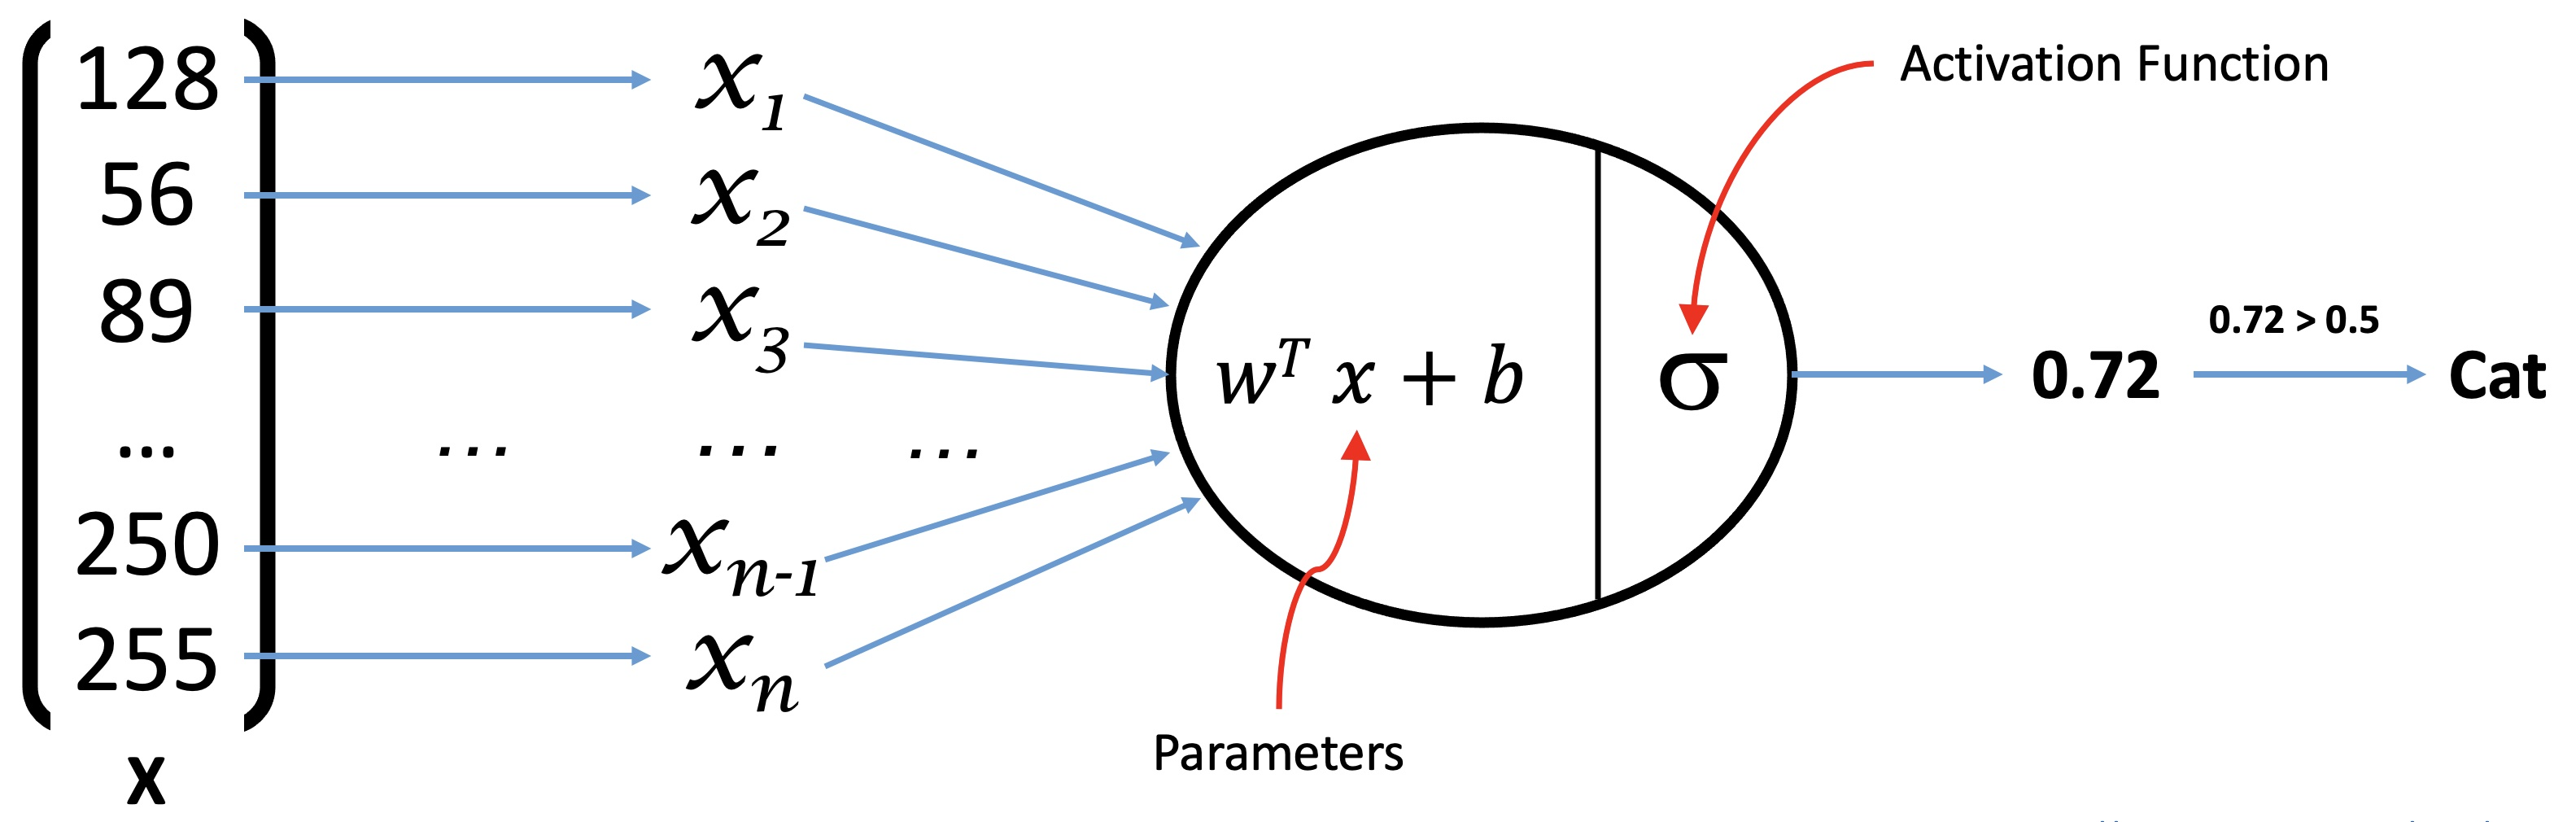

### Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Create a toy dataset for House-Price Prediction

Sample data:

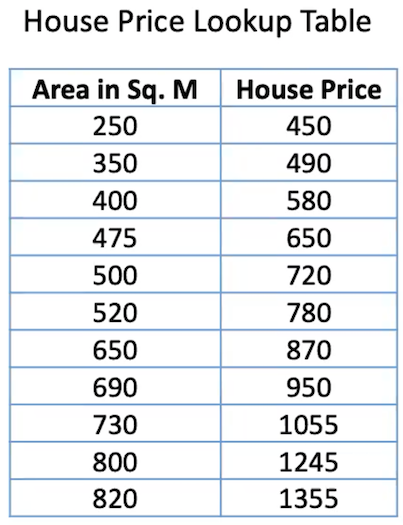

In [ ]:
# Features (Size in SqM)
house_size = np.array([[250], [350], [400], [475], [500], [520], [650], [690], [730], [800], [820]])
# Target (house prices in 100ks)
house_price = np.array([[450], [490], [580], [650],  [720], [780], [870], [950], [1055], [1245], [1355]])

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(house_size)
X_test = scaler.transform(house_size)

### Create the Neural Network and Train

Hint: Use Keras.layers.Dense()

In [ ]:
# Create a linear regression model
model = keras.Sequential([
    keras.layers.Dense(1, input_dim=1)  # Single neuron with input dimension 1
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history_oneLayer = model.fit(X_train, house_price, epochs=1000, verbose=0)  # You can adjust the number of epochs

# Evaluate the model
mse = model.evaluate(X_test, house_price)
print(f"Mean Squared Error: {mse}")

1/1 [==============================] - 0s 183ms/step - loss: 4330.8120
Mean Squared Error: 4330.81201171875


### Plot loss curve

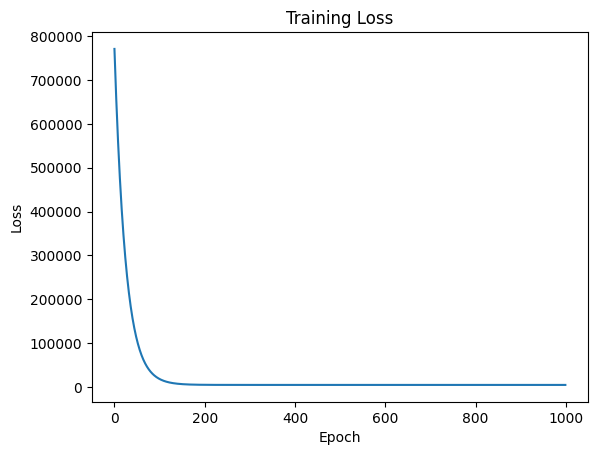

In [ ]:
# Plot training loss
plt.plot(history_oneLayer.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Predict on unknown data

In [ ]:
# Predict house price for a new input
new_input = np.array([[800]])  # Replace with your input size
new_input_scaled = scaler.transform(new_input)
predicted_price = model.predict(new_input_scaled)
print(f"House Size: {new_input} | Predicted House Price: ${predicted_price[0][0]}")  # Convert back to actual price

1/1 [==============================] - 0s 135ms/step
House Size: [[800]] | Predicted House Price: $1195.0809326171875


### Predict on complete training set and visualize

1/1 [==============================] - 0s 40ms/step
Predictions on Train Set 
 [[ 353.58997]
 [ 506.58835]
 [ 583.0875 ]
 [ 697.8363 ]
 [ 736.0859 ]
 [ 766.68555]
 [ 965.5834 ]
 [1026.7827 ]
 [1087.982  ]
 [1195.0809 ]
 [1225.6807 ]]


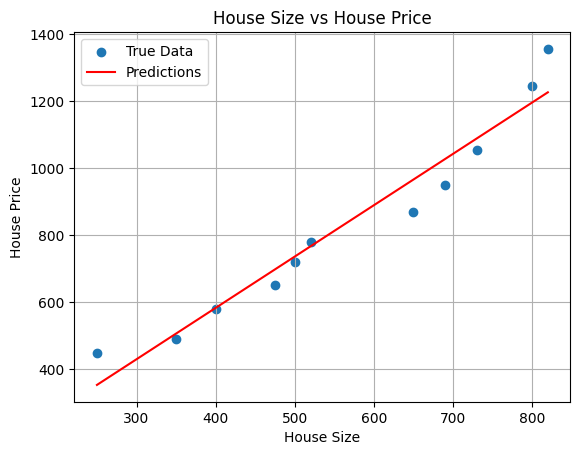

In [ ]:
# Predict and visualize
house_size_scaled = scaler.transform(house_size)
predictions = model.predict(house_size_scaled)
print("Predictions on Train Set \n",predictions)
plt.scatter(house_size, house_price, label='True Data')
plt.plot(house_size, predictions, color='red', label='Predictions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()


## 2) ANN using Tensorflow (multiple neuron) one layer for Function Approximation

### Create the Neural Network and Train

#### Example Configuration to use

* Input layer : Shape: 1
* Hidden layer: Shape: 32, Activation: Relu
* Output layer: Shape: 1, Activation: linear/relu

In [ ]:
# Define the model (Non-Linear)
model_multilayer_simple = tf.keras.models.Sequential([
    keras.layers.Input(shape=(1,)),              # Input layer
    keras.layers.Dense(32, activation='relu'),   # Hidden layer with ReLU activation
    keras.layers.Dense(1, activation='linear')   # Output layer with linear activation
])

# Compile the model
model_multilayer_simple.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_multiLayer_simple= model_multilayer_simple.fit(X_train, house_price, epochs=10000, verbose=0)  # You can adjust the number of epochs

# Evaluate the model
mse = model_multilayer_simple.evaluate(X_test, house_price)
print(f"Mean Squared Error: {mse}")

# Predict house prices for the training data
predicted_prices = model_multilayer_simple.predict(X_test)
print(predicted_prices)

1/1 [==============================] - 0s 92ms/step - loss: 1040.3768
Mean Squared Error: 1040.3768310546875
1/1 [==============================] - 0s 51ms/step
[[ 479.5481 ]
 [ 488.95087]
 [ 561.5054 ]
 [ 670.3372 ]
 [ 706.6145 ]
 [ 735.6363 ]
 [ 924.27814]
 [ 982.3218 ]
 [1071.1895 ]
 [1246.5004 ]
 [1296.5891 ]]


### Plot the loss curve

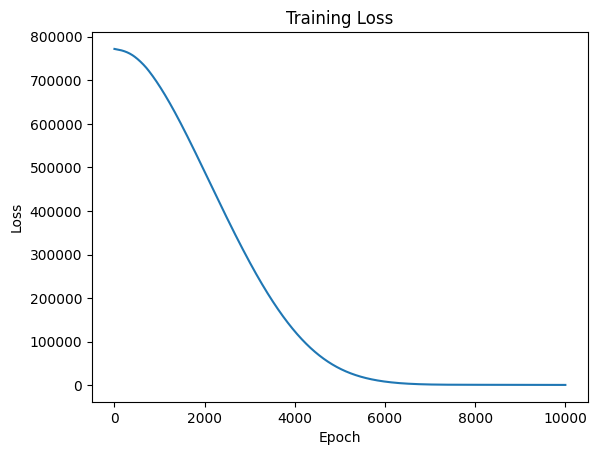

In [ ]:
# Plot training loss
plt.plot(history_multiLayer_simple.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Predict on unknown data

In [ ]:
# Predict house price for a new input
new_input = np.array([[800]])  # Replace with your input size
new_input_scaled = scaler.transform(new_input)
predicted_price = model_multilayer_simple.predict(new_input_scaled)
print(f"House Size: {new_input} | Predicted House Price: ${predicted_price[0][0]}")  # Convert back to actual price

1/1 [==============================] - 0s 25ms/step
House Size: [[800]] | Predicted House Price: $1246.5003662109375


### Predict on complete training set and visualize

1/1 [==============================] - 0s 26ms/step
Predictions on Train Set 
 [[ 479.5481 ]
 [ 488.95087]
 [ 561.5054 ]
 [ 670.3372 ]
 [ 706.6145 ]
 [ 735.6363 ]
 [ 924.27814]
 [ 982.3218 ]
 [1071.1895 ]
 [1246.5004 ]
 [1296.5891 ]]


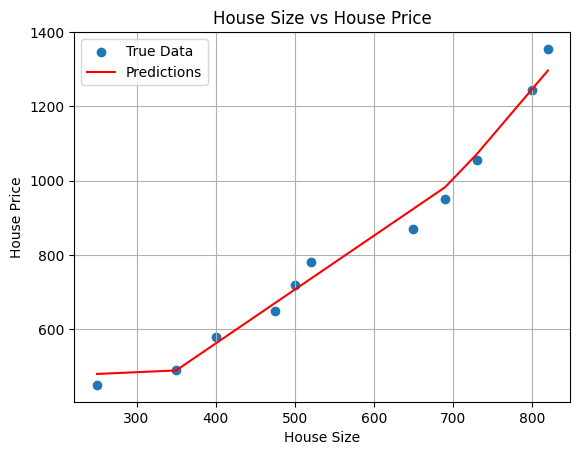

In [ ]:
# Predict and visualize
house_size_scaled = scaler.transform(house_size)
predictions = model_multilayer_simple.predict(house_size_scaled)
print("Predictions on Train Set \n",predictions)
plt.scatter(house_size, house_price, label='True Data')
plt.plot(house_size, predictions, color='red', label='Predictions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()


# Example-2: Approximate the relationship between a car's engine horsepower and its fuel efficiency (miles per gallon, MPG) using a neural network.

In [ ]:
import pandas as pd

# Load the dataset (you can replace this with your dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
raw_dataset = pd.read_csv(url, names=column_names, sep='\s+', na_values='?')
dataset = raw_dataset.dropna()

# Select the features (in this case, we'll use only 'Horsepower' as a feature)
features = dataset['Horsepower']
target = dataset['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))


### Create Neural netwrok and train

In [ ]:
# Create a neural network
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),          # Input layer
    keras.layers.Dense(10, activation='relu'),  # Hidden layer with ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model to approximate the relationship between horsepower and MPG
history = model.fit(X_train_scaled, y_train, epochs=1000, verbose=0)  # You can adjust the number of epochs

# Generate predictions using the trained model
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 4ms/step


### Plot results

4/4 [==============================] - 0s 2ms/step


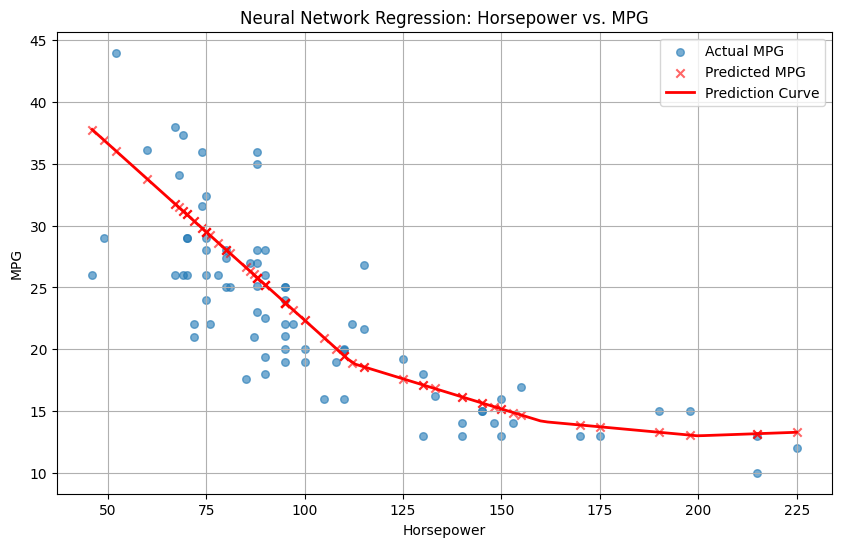

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual MPG', s=30, alpha=0.6)
plt.scatter(X_test, y_pred, label='Predicted MPG', color='red', marker='x', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Neural Network Regression: Horsepower vs. MPG')
plt.grid(True)

# Add a line plot for the prediction curve
x_curve = np.linspace(X_test.min(), X_test.max(), 100)
y_curve = model.predict(scaler.transform(x_curve.reshape(-1, 1)))
plt.plot(x_curve, y_curve, color='red', label='Prediction Curve', linewidth=2)
plt.legend()

plt.show()
